In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
county_df = pd.read_csv('Labor_Force_and_Unemployment_Rate_for_California_Counties.csv')
county_df.head()

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,County,Alameda County,01/01/1990,1990,January,N,Final,676600,650600,26000,0.038
1,County,Alpine County,01/01/1990,1990,January,N,Final,600,580,20,0.025
2,County,Amador County,01/01/1990,1990,January,N,Final,11100,10350,760,0.068
3,County,Butte County,01/01/1990,1990,January,N,Final,76800,69400,7400,0.096
4,County,Calaveras County,01/01/1990,1990,January,N,Final,12980,11840,1130,0.087


In [4]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 11 columns):
Area Type                        21417 non-null object
Area Name                        21417 non-null object
Date                             21417 non-null object
Year                             21417 non-null int64
Month                            21417 non-null object
Seasonally Adjusted (Y/N)        21417 non-null object
Status (Preliminary / Final)     21417 non-null object
Labor Force                      21417 non-null int64
Employment                       21417 non-null int64
Unemployment                     21417 non-null int64
Unemployment Rate                21417 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.8+ MB


In [5]:
county_df.isna().sum()

Area Type                        0
Area Name                        0
Date                             0
Year                             0
Month                            0
Seasonally Adjusted (Y/N)        0
Status (Preliminary / Final)     0
Labor Force                      0
Employment                       0
Unemployment                     0
Unemployment Rate                0
dtype: int64

In [6]:
county_df.columns

Index(['Area Type ', 'Area Name ', 'Date', 'Year ', 'Month',
       'Seasonally Adjusted (Y/N) ', 'Status (Preliminary / Final) ',
       'Labor Force', 'Employment ', 'Unemployment ', 'Unemployment Rate '],
      dtype='object')

In [7]:
round(county_df.groupby(['Year ']).mean(),2)

,Labor Force,Employment,Unemployment,Unemployment Rate
Year,,,,
1990,332787.73,313478.35,19309.18,0.08
1991,332175.42,306333.36,25843.93,0.10
1992,334704.68,303134.93,31568.93,0.12
1993,332252.16,300446.65,31805.21,0.12
1994,331291.36,302332.26,28959.18,0.11
1995,330928.90,304796.23,26132.23,0.11
1996,334692.84,309716.55,24976.75,0.10
1997,342560.47,320375.10,22188.83,0.09
1998,350474.42,329158.43,21316.41,0.09


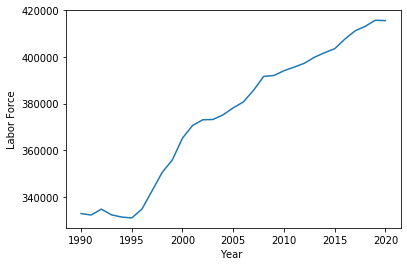

In [8]:
labor_force_over_time = pd.DataFrame(county_df.groupby(['Year ']).mean()['Labor Force'])
labor_force_over_time.columns = ['Labor Force']
sns.lineplot(labor_force_over_time.index, labor_force_over_time['Labor Force'])

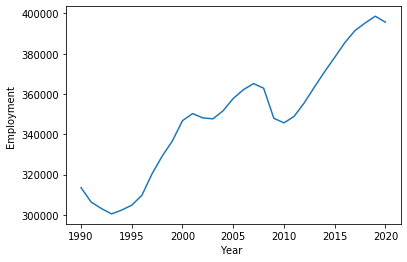

In [9]:
employment_over_time = pd.DataFrame(county_df.groupby(['Year ']).mean()
                                    .drop(['Labor Force', 'Unemployment Rate '],axis=1))
sns.lineplot(employment_over_time.index, employment_over_time['Employment '])

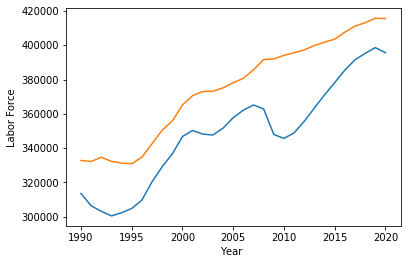

In [10]:
sns.lineplot(employment_over_time.index, employment_over_time['Employment '])
sns.lineplot(labor_force_over_time.index, labor_force_over_time['Labor Force'])

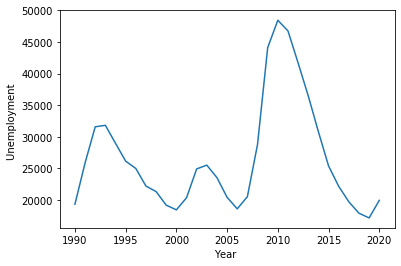

In [11]:
sns.lineplot(employment_over_time.index, employment_over_time['Unemployment '])

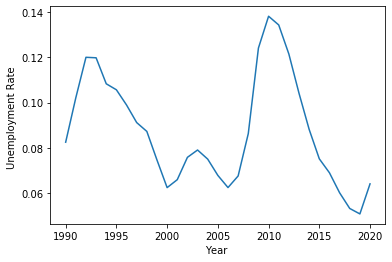

In [12]:
employment_rate_over_time = pd.DataFrame(county_df.groupby(['Year ']).mean()['Unemployment Rate '])
sns.lineplot(employment_rate_over_time.index, employment_rate_over_time['Unemployment Rate '])

In [13]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [15]:
map_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
CA_map_data = df_sample[df_sample['STNAME'] == 'California']

In [16]:
CA_fips = CA_map_data[['FIPS','CTYNAME']]
CA_fips.columns = ['FIPS','Area Name ']

In [17]:
county_map_data = pd.merge(county_df, CA_fips, on='Area Name ')

In [18]:
to_graph = county_map_data[county_map_data['Year ']==2020]
to_graph = to_graph[to_graph['Month']=='March']

In [19]:
to_graph.head()

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate,FIPS
92,County,Alameda County,03/01/2020,2020,March,N,Preliminary,833500,801500,31900,0.038,6001
455,County,Alpine County,03/01/2020,2020,March,N,Preliminary,530,490,40,0.071,6003
818,County,Amador County,03/01/2020,2020,March,N,Preliminary,14850,14050,800,0.054,6005
1181,County,Butte County,03/01/2020,2020,March,N,Preliminary,98800,92200,6700,0.067,6007
1544,County,Calaveras County,03/01/2020,2020,March,N,Preliminary,21530,20380,1160,0.054,6009


In [20]:
fips = to_graph['FIPS'].tolist()
values = to_graph['Unemployment Rate '].tolist()

colorscale = [
    'rgb(191, 211, 230)',
    'rgb(158, 188, 218)',
    'rgb(140,150,198)',
    'rgb(140,107,177)',
    'rgb(136, 65, 177)',
    'rgb(129, 15, 124)',
    'rgb(77, 0, 75)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[0.05, 0.07, 0.10, 0.13, 0.16, 0.20], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=False,
    show_hover=True,
    legend_title='Unemployment Rate', title='California Unemployment Data by County (March 2020)'
)
fig.layout.template = None
fig.show()

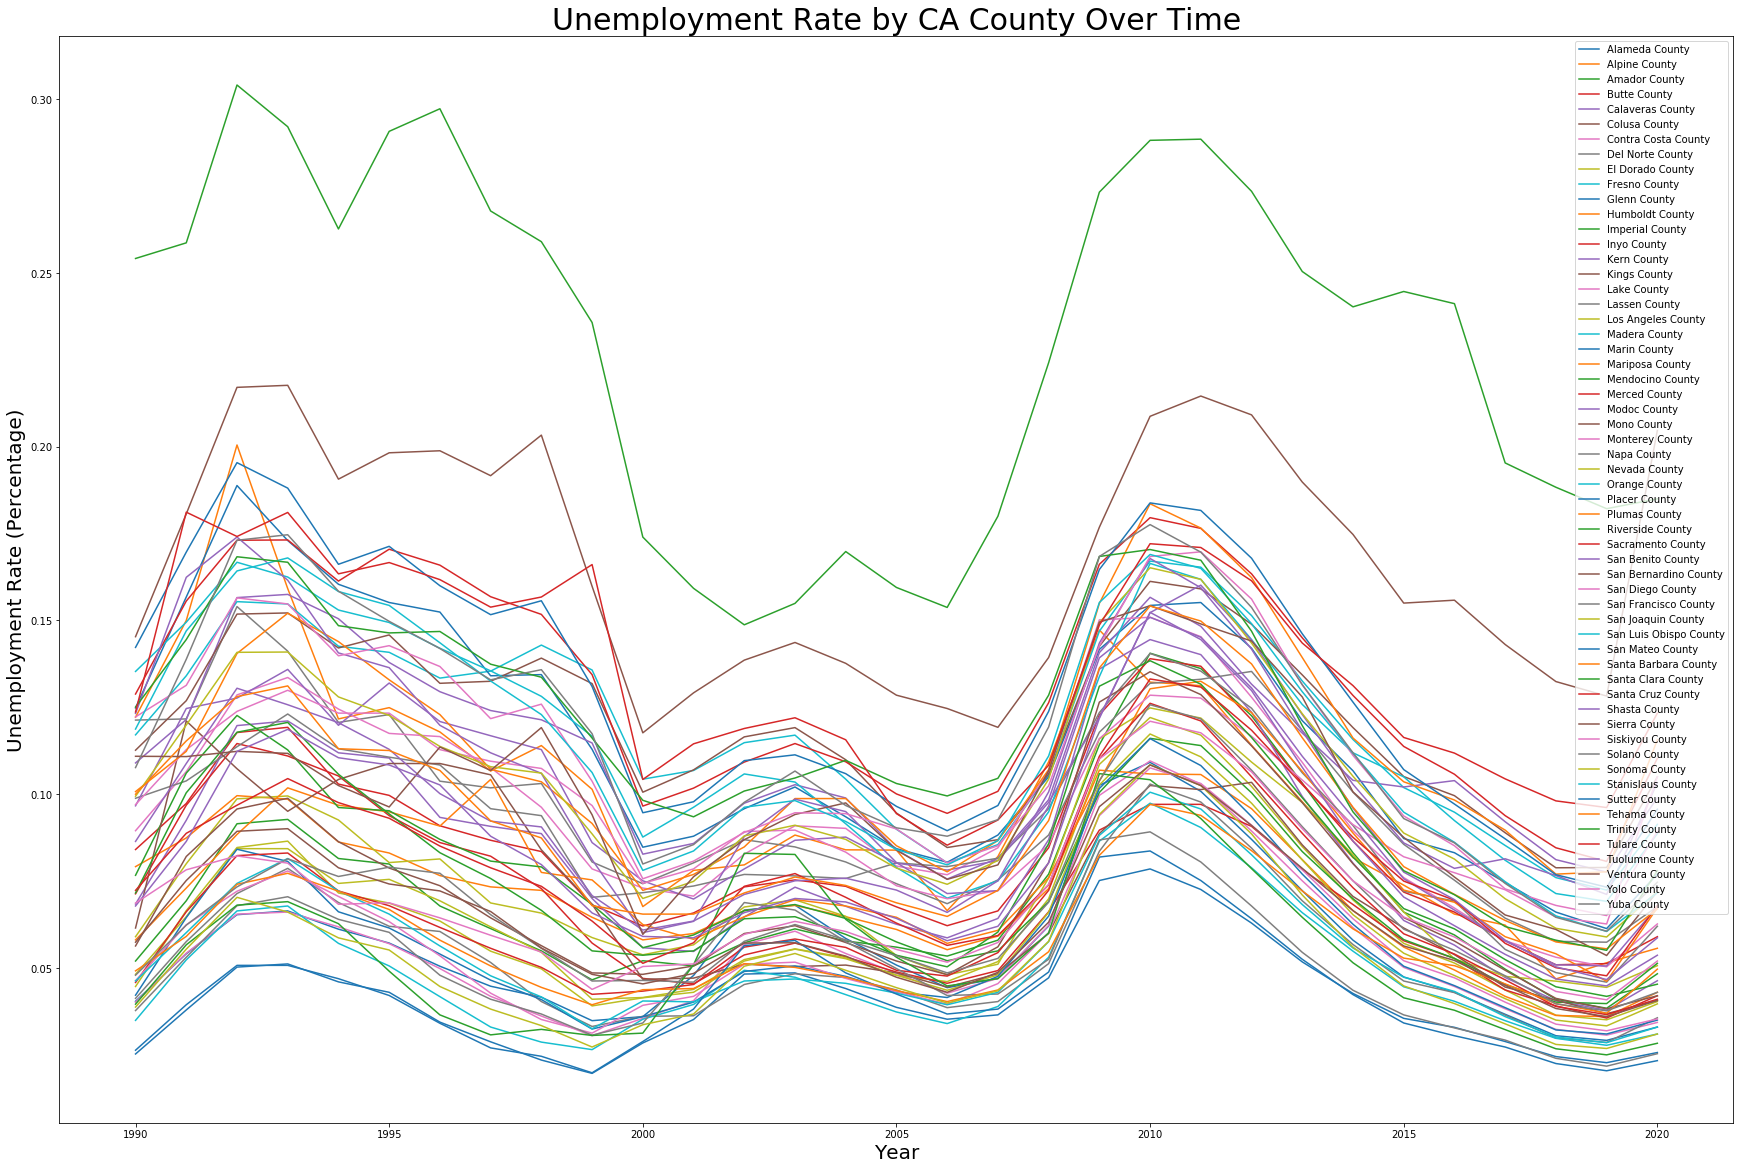

In [36]:
plt.figure(figsize=(30,20))
for county in county_map_data['Area Name '].unique():
    to_graph = county_map_data[county_map_data['Area Name ']==county]
    to_graph = to_graph.groupby(['Year ']).mean()
    sns.lineplot(to_graph.index, to_graph['Unemployment Rate '],label=county)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Unemployment Rate (Percentage)',fontsize=20)
plt.legend(loc='best')
plt.title('Unemployment Rate by CA County Over Time',fontsize=30)
plt.show()